Analyzing Sales Decrease in the "Others" Category Between 2021 and 2022 Scenario: The Warehouse Team has observed a surplus in the stock of "Others" category products at the end of 2022. They would like to know if sales have declined in 2022 compared to 2021. Additionally, they want to see the 20 products that experienced the largest decrease in sales. Requirements: 1. Create two datasets: o One for sales data in 2021 (qty_ordered for "Others" category). o One for sales data in 2022 (qty_ordered for "Others" category). 2. Merge the datasets and calculate the sales difference between 2022 and 2021. 3. Calculate the percentage change in sales and classify it as "DOWN", "UP", or "FAIR". 4. Sort the products by the largest decrease in sales and show the top 20 products. 5. Create a horizontal bar chart to display the products with the largest decrease in sales between 2022 and 2021. Key Features to Use: • category • order_date (for filtering by year) • is_valid • sku_name • qty_ordered

C:\Users\bhave\AppData\Local\Temp\ipykernel_12836\1771434896.py:42: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_2021 = pd.read_sql(query_2021, connection)
C:\Users\bhave\AppData\Local\Temp\ipykernel_12836\1771434896.py:43: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_2022 = pd.read_sql(query_2022, connection)


Top 20 Products with Largest Decrease in 'Others' Category (2022 vs 2021):
                                              sku_name  qty_2021  qty_2022  \
69                       RB_Dettol Germ Busting Kit-bf     200.0      45.0   
18                            Dawlance_MD 10 + DWB 600      23.0       0.0   
84                                 Telemall_MM-DR-HB-L      23.0       2.0   
137             iu_Tickets General Enclosure-Islamabad      20.0       0.0   
70                      RS_Rehmat-e-Shereen Mix Mithai      13.0       0.0   
141                                    kansai_NeverWet      10.0       1.0   
154                        sindbad_Sindbad Gift Card-3       7.0       0.0   
133                                         emart_00-1       7.0       1.0   
93                                      Vouch 365 2016       5.0       0.0   
4                                     Am-PTV_ATS-004-M       5.0       0.0   
129                                 duma_4561253300294       4.0   

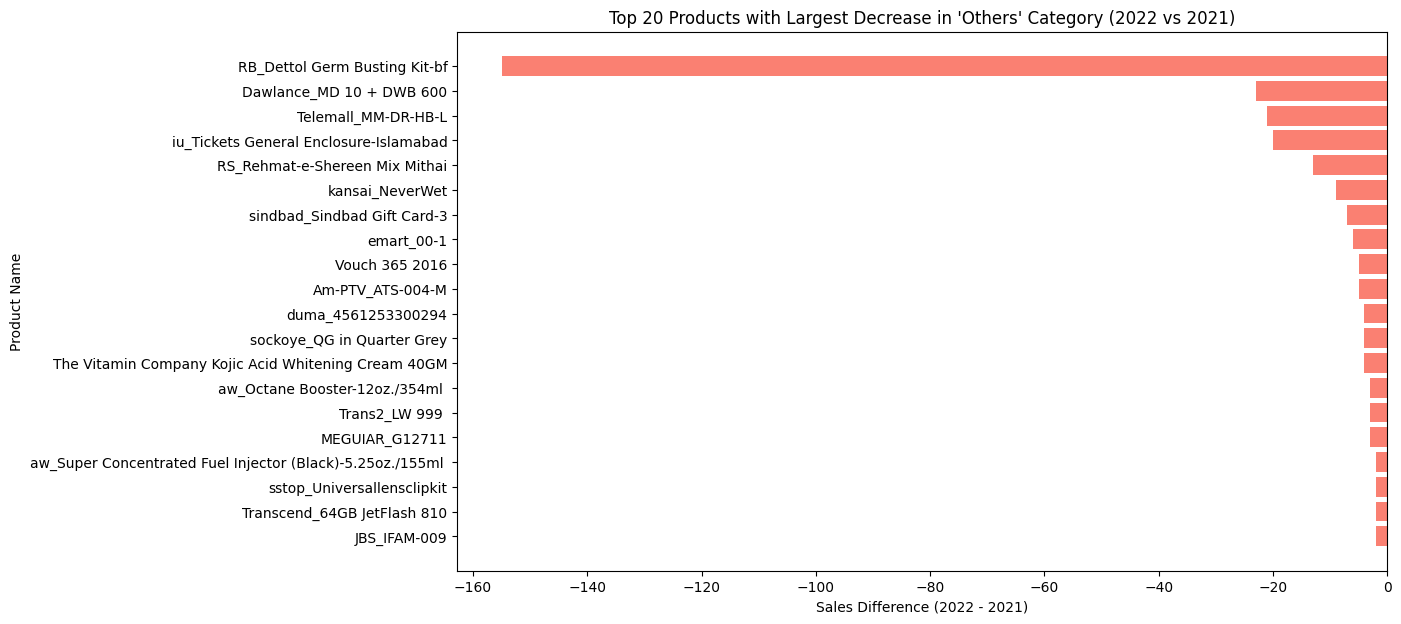

In [1]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt

# Database connection details
db_config = {
    "host": "localhost",
    "user": "root",
    "password": "HA032908@",   # replace with your DB password
    "database": "sales",
    "port": 3306
}

# SQL Query for 2021 sales (Others category)
query_2021 = """
SELECT 
    s.sku_name,
    SUM(o.qty_ordered) AS qty_2021
FROM order_detail o
JOIN sku_detail s ON o.sku_id = s.id
WHERE s.category = 'Others'
  AND YEAR(o.order_date) = 2021
  AND o.is_valid = 1
GROUP BY s.sku_name;
"""

# SQL Query for 2022 sales (Others category)
query_2022 = """
SELECT 
    s.sku_name,
    SUM(o.qty_ordered) AS qty_2022
FROM order_detail o
JOIN sku_detail s ON o.sku_id = s.id
WHERE s.category = 'Others'
  AND YEAR(o.order_date) = 2022
  AND o.is_valid = 1
GROUP BY s.sku_name;
"""

# Step 1: Connect to DB and fetch both datasets
connection = pymysql.connect(**db_config)
df_2021 = pd.read_sql(query_2021, connection)
df_2022 = pd.read_sql(query_2022, connection)
connection.close()

# Step 2: Merge datasets on sku_name
merged = pd.merge(df_2021, df_2022, on="sku_name", how="outer").fillna(0)

# Step 3: Calculate difference and percentage change
merged["difference"] = merged["qty_2022"] - merged["qty_2021"]
merged["pct_change"] = ((merged["qty_2022"] - merged["qty_2021"]) / 
                        merged["qty_2021"].replace(0, 1)) * 100

# Step 4: Classify sales trend
def classify(change):
    if change < -10:
        return "DOWN"
    elif change > 10:
        return "UP"
    else:
        return "FAIR"

merged["trend"] = merged["pct_change"].apply(classify)

# Step 5: Get Top 20 products with largest decrease
top20_decrease = merged.sort_values(by="difference", ascending=True).head(20)

# Step 6: Show results
print("Top 20 Products with Largest Decrease in 'Others' Category (2022 vs 2021):")
print(top20_decrease)

# Step 7: Plot Horizontal Bar Chart
plt.figure(figsize=(12, 7))
plt.barh(top20_decrease["sku_name"], top20_decrease["difference"], color="salmon")
plt.xlabel("Sales Difference (2022 - 2021)")
plt.ylabel("Product Name")
plt.title("Top 20 Products with Largest Decrease in 'Others' Category (2022 vs 2021)")
plt.gca().invert_yaxis()  # biggest decrease on top
plt.show()
